# Application for TSAS

This document has been published for reproducing the application presented in a conference paper dedicated to AeroMAPS, focuding on the reproduction of ICAO LTAG scenarios. The different assumptions of this prospective scenario are given in the following. 

> **⚠ This notebook has been developed with the AeroMAPS version v0.7.1-beta for obtaining the paper results. However, this notebook has been or could be modified in order to be executable with the latest versions of AeroMAPS, which sometimes leads to different results compared to the ones from the paper, due to some models' modifications. In order to retrieve the results of the paper, one can use the v0.4.2-beta version associated with the original notebook.**

## Load

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_bottom_up,
    models_efficiency_top_down,
    models_efficiency_top_down_interp,
    models_energy_with_fuel_effect,
    models_offset,
    models_climate_fair,
    models_sustainability,
    models_energy_cost_complex,
    models_operation_cost_top_down,
    models_production_cost,
    models_abatements_cost_simplified,
)
from aeromaps.utils.functions import create_partitioning, merge_json_files

## Partitioning for international aviation

In [2]:
create_partitioning(file="data_tsas/aeroscope_international_data.csv", path="data_tsas")

## Models

In [3]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down_interp": models_efficiency_top_down_interp,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_fair": models_climate_fair,
    "models_energy_cost_complex": models_energy_cost_complex,
    "models_operation_cost_top_down": models_operation_cost_top_down,
    "models_abatements_cost_simplified": models_abatements_cost_simplified,
}

## Process, data and compute

In [4]:
unit_test = False

In [5]:
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is0high_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is0high_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is0low_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is0low_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is0medium_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is0medium_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is1high_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is1high_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is1low_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is1low_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is1medium_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is1medium_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is2high_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is2high_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is2low_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is2low_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is2medium_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is2medium_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is3high_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is3high_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is3low_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is3low_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is3medium_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is3medium_inputs.json",
)

In [6]:
if unit_test:
    process_test = create_process(
        configuration_file="data_tsas/config_files/config_is3medium.json", models=models
    )
else:
    process_is0high = create_process(
        configuration_file="data_tsas/config_files/config_is0high.json", models=models
    )
    process_is0low = create_process(
        configuration_file="data_tsas/config_files/config_is0low.json", models=models
    )
    process_is0medium = create_process(
        configuration_file="data_tsas/config_files/config_is0medium.json", models=models
    )
    process_is1high = create_process(
        configuration_file="data_tsas/config_files/config_is1high.json", models=models
    )
    process_is1low = create_process(
        configuration_file="data_tsas/config_files/config_is1low.json", models=models
    )
    process_is1medium = create_process(
        configuration_file="data_tsas/config_files/config_is1medium.json", models=models
    )
    process_is2high = create_process(
        configuration_file="data_tsas/config_files/config_is2high.json", models=models
    )
    process_is2low = create_process(
        configuration_file="data_tsas/config_files/config_is2low.json", models=models
    )
    process_is2medium = create_process(
        configuration_file="data_tsas/config_files/config_is2medium.json", models=models
    )
    process_is3high = create_process(
        configuration_file="data_tsas/config_files/config_is3high.json", models=models
    )
    process_is3low = create_process(
        configuration_file="data_tsas/config_files/config_is3low.json", models=models
    )
    process_is3medium = create_process(
        configuration_file="data_tsas/config_files/config_is3medium.json", models=models
    )

In [7]:
# process_test.parameters.kerosene_emission_factor_reference_years = []
# process_test.parameters.kerosene_emission_factor_reference_years_values = [74]
#
## Aircraft energy - Introduction of alternative drop-in fuels
#
### Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
# process_test.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050, 2070]
# process_test.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0, 35.0]
# process_test.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060, 2070]
# process_test.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0, 48, 58.0]

## Various environmental settings
#
### Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
# process_test.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
# process_test.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
# process_test.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
# process_test.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]
#
### Emission factors for electricity (2019 value: 429 gCO2/kWh)
# process_test.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

In [8]:
if unit_test:
    process_test.compute()
else:
    process_is0high.compute()
    process_is0low.compute()
    process_is0medium.compute()
    process_is1high.compute()
    process_is1low.compute()
    process_is1medium.compute()
    process_is2high.compute()
    process_is2low.compute()
    process_is2medium.compute()
    process_is3high.compute()
    process_is3low.compute()
    process_is3medium.compute()

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, th

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")


## Results

In [9]:
if unit_test:
    process = process_test
else:
    process = process_is0medium

interactive(children=(IntSlider(value=2050, description='Year:', max=2070, min=2019), FloatText(value=0.0, des…

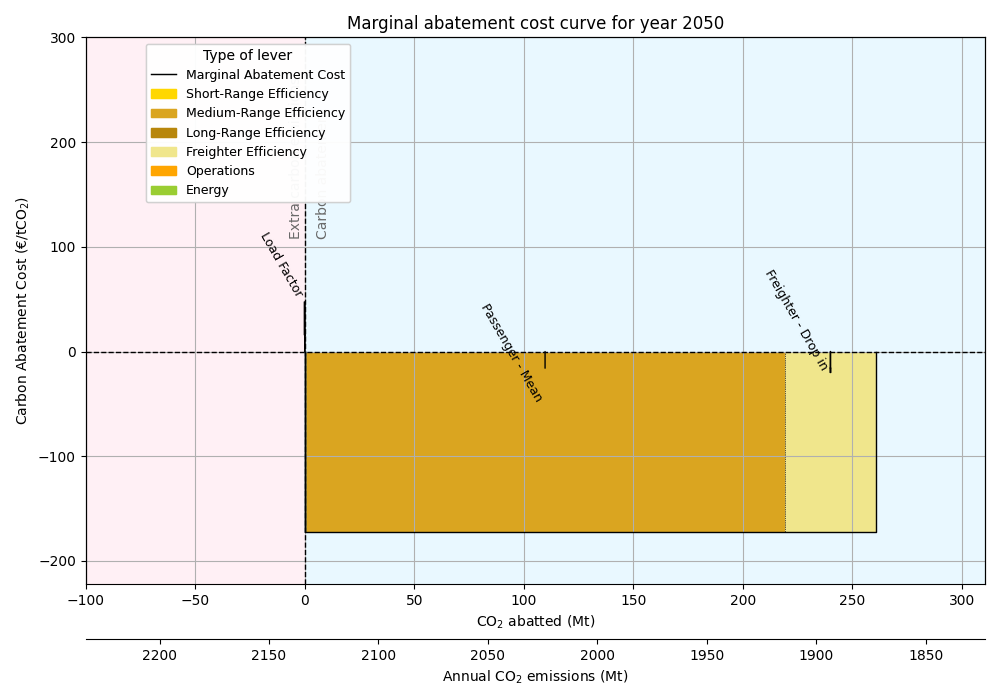

In [10]:
process.plot("annual_MACC_simple_fleet")

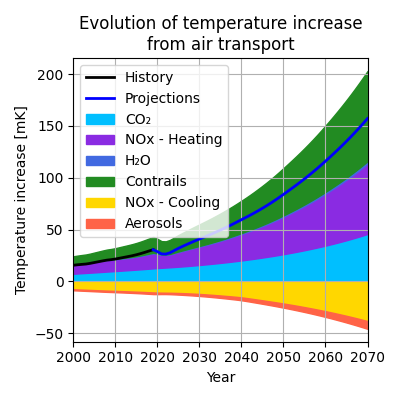

In [11]:
process.plot("detailed_temperature_increase_from_air_transport")

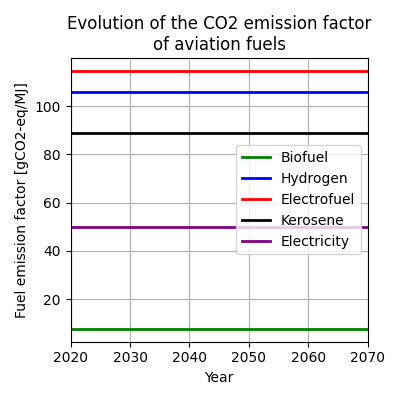

In [12]:
process.plot("emission_factor_per_fuel")

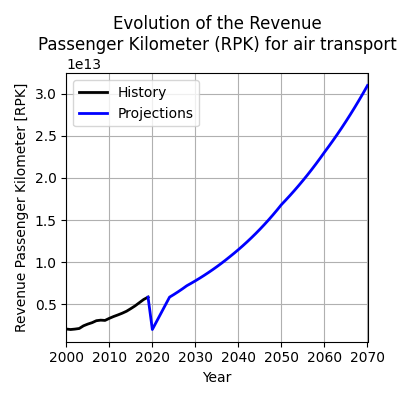

In [13]:
process.plot("revenue_passenger_kilometer")

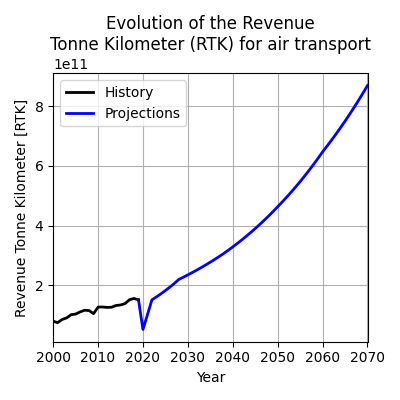

In [14]:
process.plot("revenue_tonne_kilometer")

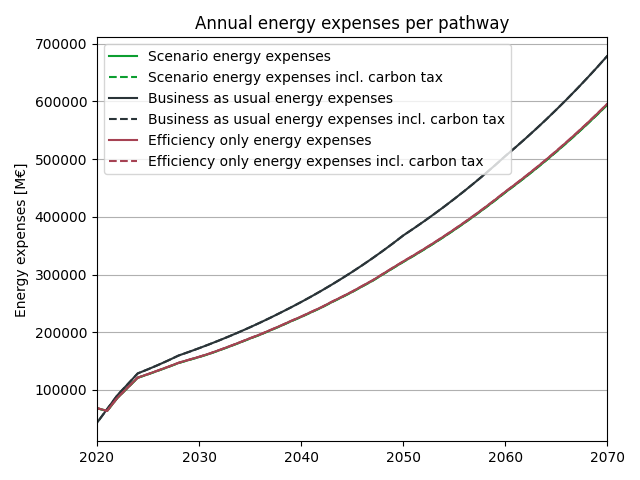

In [15]:
process.plot("energy_expenses_carbon_tax_effect")

## end debug zone

In [16]:
process.data["vector_outputs"]["energy_per_ask_mean_without_operations"][2050] * 0.831

0.7209074339853357

In [17]:
process.data["climate_outputs"].loc[
    [2019, 2030, 2040, 2050], ["co2_emissions"]
] * 0.831  # correction to account for scope diffrence

,co2_emissions
2019,608.513406
2030,759.133701
2040,1095.358544
2050,1556.500326


In [18]:
raw_data = "0,0%1,7%2,8%3,5%3,9%4,8%5,7%6,6%7,4%8,2%9,0%10,5%11,9%13,2%14,5%15,7%16,7%17,6%18,5%19,3%20,0%23,4%26,6%29,7%32,7%35,6%38,3%41,0%43,5%45,9%48,3%49,0%49,6%50,3%50,9%51,5%52,1%52,7%53,3%53,8%54,4%54,1%53,8%53,5%53,2%52,9%52,6%52,3%52,0%51,7%51,4%"

# Convertir en tableau NumPy
data = np.array([float(value.replace(",", ".")) for value in raw_data.split("%") if value])

# Afficher les données avec des virgules
print(", ".join(map(str, data)))

0.0, 1.7, 2.8, 3.5, 3.9, 4.8, 5.7, 6.6, 7.4, 8.2, 9.0, 10.5, 11.9, 13.2, 14.5, 15.7, 16.7, 17.6, 18.5, 19.3, 20.0, 23.4, 26.6, 29.7, 32.7, 35.6, 38.3, 41.0, 43.5, 45.9, 48.3, 49.0, 49.6, 50.3, 50.9, 51.5, 52.1, 52.7, 53.3, 53.8, 54.4, 54.1, 53.8, 53.5, 53.2, 52.9, 52.6, 52.3, 52.0, 51.7, 51.4


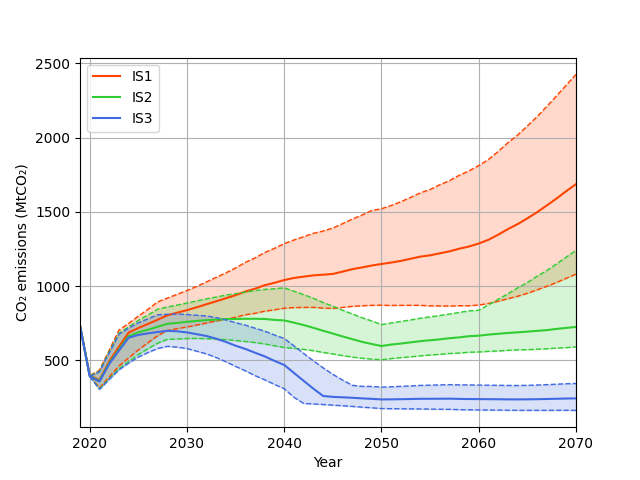

In [19]:
data_years = np.array((range(2019, 2071)))

fig, ax = plt.subplots()

ax.plot(
    data_years,
    process_is1low.data["climate_outputs"][["co2_emissions"]].values[2019 - 1940 : 2070 - 1940 + 1],
    color="orangered",
    linestyle="--",
    linewidth=1,
)
ax.plot(
    data_years,
    process_is1medium.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="orangered",
    linestyle="-",
    label="IS1",
)
ax.plot(
    data_years,
    process_is1high.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="orangered",
    linestyle="--",
    linewidth=1,
)
ax.fill_between(
    np.array(data_years),
    np.array(
        process_is1high.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    np.array(
        process_is1low.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    color="orangered",
    alpha=0.2,
)

ax.plot(
    data_years,
    process_is2low.data["climate_outputs"][["co2_emissions"]].values[2019 - 1940 : 2070 - 1940 + 1],
    color="limegreen",
    linestyle="--",
    linewidth=1,
)
ax.plot(
    data_years,
    process_is2medium.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="limegreen",
    linestyle="-",
    label="IS2",
)
ax.plot(
    data_years,
    process_is2high.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="limegreen",
    linestyle="--",
    linewidth=1,
)
ax.fill_between(
    np.array(data_years),
    np.array(
        process_is2high.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    np.array(
        process_is2low.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    color="limegreen",
    alpha=0.2,
)

ax.plot(
    data_years,
    process_is3low.data["climate_outputs"][["co2_emissions"]].values[2019 - 1940 : 2070 - 1940 + 1],
    color="royalblue",
    linestyle="--",
    linewidth=1,
)
ax.plot(
    data_years,
    process_is3medium.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="royalblue",
    linestyle="-",
    label="IS3",
)
ax.plot(
    data_years,
    process_is3high.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="royalblue",
    linestyle="--",
    linewidth=1,
)
ax.fill_between(
    np.array(data_years),
    np.array(
        process_is3high.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    np.array(
        process_is3low.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    color="royalblue",
    alpha=0.2,
)

ax.set(
    xlabel="Year",
    ylabel="CO₂ emissions (MtCO₂)",
)
ax.grid()
plt.xlim(2019, 2070)
plt.legend()
plt.show()

## Cost comparision 

First, cumulative cost saving thanks to efficiency (technology and operational) measures is compared between ICAO reference and AeroMAPS simulation.  
Dollars are converted into euros using a 1.1 arbitrary exchange rate, representative of 2020 values.   

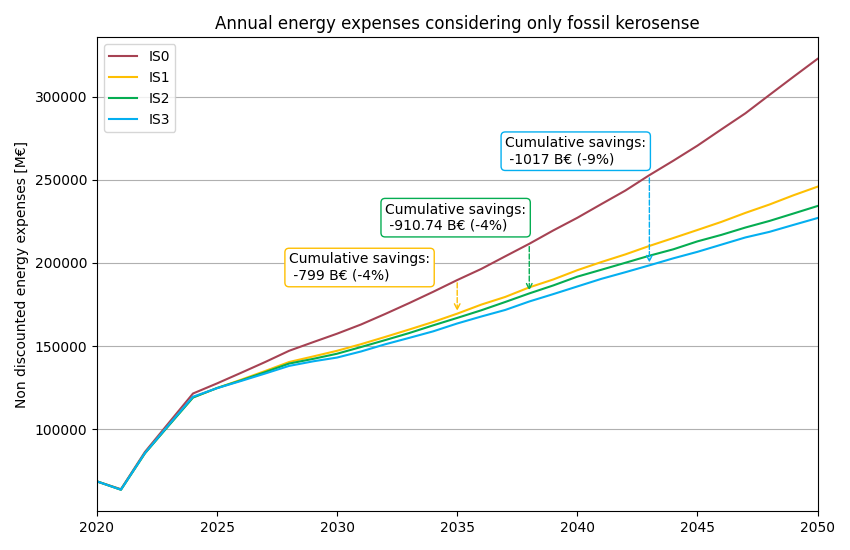

In [43]:
fig_eff,ax = plt.subplots(figsize=(8.5,5.5))

data_years = np.array((range(2019, 2051)))

ax.plot(
    data_years,
    process_is0medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"],
    label="IS0",
    linestyle="-",
    color="#A64253",
)

cumul_is0=process_is0medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"].sum()


ax.plot(
    data_years,
    process_is1medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"],
    label="IS1",
    linestyle="-",
    color="#FEBF02",
)

is1_save=cumul_is0-process_is1medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"].sum()


ax.plot(
    data_years,
    process_is2medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"],
    label="IS2",
    linestyle="-",
    color="#05AD52",
)

is2_save=cumul_is0-process_is2medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"].sum()

ax.plot(
    data_years,
    process_is3medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"],
    label="IS3",
    linestyle="-",
    color="#04AFF0",
)

is3_save=cumul_is0-process_is3medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"].sum()


# Adding textboxes and arrows




ax.annotate(
    f"Cumulative savings:\n {-is1_save/1000:.0f} B€ ({(is1_save/1000-836)/836*100:.0f}%)",
    xytext=(2028, 1.9e5),
    xy=(2028, 1.9e5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="#FEBF02", facecolor="white"),
)

ax.annotate(
    "",
    xy=(2035,process_is1medium.data['vector_outputs'].loc[2035, "non_discounted_full_kero_energy_expenses"]),
    xytext=(2035,process_is0medium.data['vector_outputs'].loc[2035, "non_discounted_full_kero_energy_expenses"]),
    arrowprops=dict(arrowstyle="->", color="#FEBF02", lw=1, ls='--'),
)



ax.annotate(
    f"Cumulative savings:\n {-is2_save/1000:.2f} B€ ({(is2_save/1000-945)/945*100:.0f}%)",
    xytext=(2032, 2.2e5),
    xy=(2032, 2.2e5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="#05AD52", facecolor="white"),
)

ax.annotate(
    "",
    xy=(2038,process_is2medium.data['vector_outputs'].loc[2038, "non_discounted_full_kero_energy_expenses"]),
    xytext=(2038,process_is0medium.data['vector_outputs'].loc[2038, "non_discounted_full_kero_energy_expenses"]),
    arrowprops=dict(arrowstyle="->", color="#05AD52", lw=1, ls='--'),
)



ax.annotate(
    f"Cumulative savings:\n {-is3_save/1000:.0f} B€ ({(is3_save/1000-1118)/1118*100:.0f}%)",
    xytext=(2037, 2.6e5),
    xy=(2037, 2.6e5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="#04AFF0", facecolor="white"),
)

ax.annotate(
    "",
    xy=(2043,process_is3medium.data['vector_outputs'].loc[2043, "non_discounted_full_kero_energy_expenses"]),
    xytext=(2043,process_is0medium.data['vector_outputs'].loc[2043, "non_discounted_full_kero_energy_expenses"]),
    arrowprops=dict(arrowstyle="->", color="#04AFF0", lw=1, ls='--'),
)







ax.grid(axis="y")
ax.legend(loc="upper left")
ax.set_title("Annual energy expenses considering only fossil kerosense")
ax.set_ylabel("Non discounted energy expenses [M€]")
ax.set_xlim(2020, 2050)

fig_eff.canvas.header_visible = False
fig_eff.canvas.toolbar_position = "bottom"
fig_eff.tight_layout()

plt.savefig('cumul_saving_eff.pdf')

Second, The MFSP of the various illustrative fuels is comapred between our simulation and ICAO values.  
The simulation was callibrated using ICAO CAPEX values but keeping default 